In [131]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [132]:
df=pd.read_csv('student-mat.csv')

In [133]:
df

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        6   5   6   6  
1    ...      5        3      3     1     1      3        4   5   5   6  
2    ...      4        3      2     2     3      3       10   7   8  10  
3    ...      3        2      2     1     1      5        2  15  14  15  
4    ...      4        3      2     1     2      5        4   6  10  10  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[395 rows x 33 columns]

In [134]:
df.school.nunique()

2

In [135]:
len(df.columns)

33

In [282]:
df[['school', 'sex', 'age', 'Pstatus', 
        'studytime',
       'failures', 'schoolsup', 
       'higher', 'internet', 'romantic', 'freetime', 'goout', 'Dalc',
       'Walc',  'absences']]

school sex  age Pstatus  studytime  failures schoolsup higher internet  \
0       GP   F   18       A          2         0       yes    yes       no   
1       GP   F   17       T          2         0        no    yes      yes   
2       GP   F   15       T          2         3       yes    yes      yes   
3       GP   F   15       T          3         0        no    yes      yes   
4       GP   F   16       T          2         0        no    yes       no   
..     ...  ..  ...     ...        ...       ...       ...    ...      ...   
390     MS   M   20       A          2         2        no    yes       no   
391     MS   M   17       T          1         0        no    yes      yes   
392     MS   M   21       T          1         3        no    yes       no   
393     MS   M   18       T          1         0        no    yes      yes   
394     MS   M   19       T          1         0        no    yes      yes   

    romantic  freetime  goout  Dalc  Walc  absences  
0         no         3      4     1     1         6  
1         no         3      3     1     1         4  
2         no         3      2     2     3        10  
3        yes         2      2     1     1         2  
4         no         3      2     1     2         4  
..       ...       ...    ...   ...   ...       ...  
390       no         5      4     4     5        11  
391       no         4      5     3     4         3  
392       no         5      3     3     3         3  
393       no         4      1     3     4         0  
394       no         2      3     3     3         5  

[395 rows x 15 columns]

In [138]:
df[['age','Walc','Dalc']].sort_values(by=['age','Walc'],ascending=False).head(7)

age  Walc  Dalc
247   22     5     5
392   21     3     3
390   20     5     4
306   20     1     1
376   20     1     1
270   19     3     3
296   19     3     2

In [139]:
df.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

In [140]:
df.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [141]:
df.groupby('school').agg({'failures':'mean', 'higher': 'count' })

failures  higher
school                  
GP      0.318052     349
MS      0.456522      46

In [142]:
# תובנה 1: בהשוואה בין שני בתי הספר הנמדדים,ממוצע הנכשלים בקורסים נמוך יותר ומספר התלמידים שילכו לרכוש השכלה גבוהה, גבוה יותר בבית ספר הראשון
# GP

Text(0.5, 0.98, 'Student Alcohol Consumption')

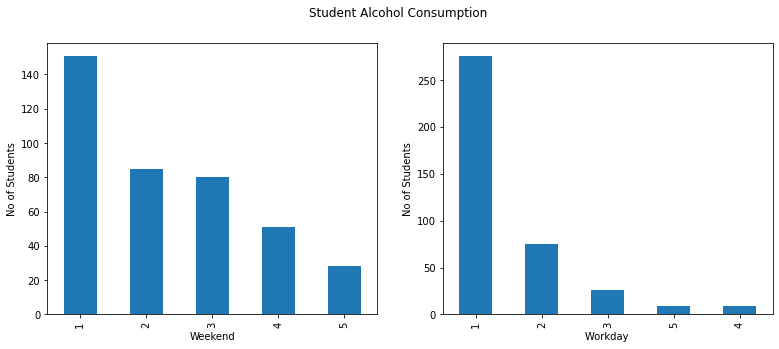

In [143]:
plt.figure(figsize=(13,5))

plt.subplot(121)
df['Walc'].value_counts().plot(kind="bar")
plt.xlabel('Weekend')
plt.ylabel('No of Students') 
#plt.gcf().suptitle('weekend alcohol consumption')


plt.subplot(122)
df['Dalc'].value_counts().plot(kind="bar")
plt.xlabel('Workday ')
plt.ylabel('No of Students') 
plt.gcf().suptitle('Student Alcohol Consumption')



In [144]:
# תובנה 2 : רוב בני הנוער אינם צורכים הרבה אלכוהול בסוף השבוע אך לעומת הגרף שמשקף את אמצע השבוע הצריכה היא רבה יותר

<BarContainer object of 2 artists>

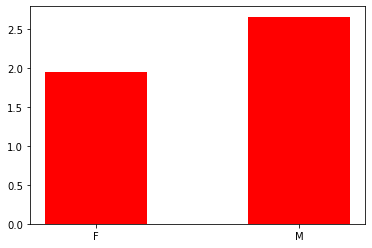

In [209]:
plt.bar(df.groupby('sex')['Walc'].mean().index, df.groupby('sex')['Walc'].mean().values,color='r'
        ,width=0.5)

In [146]:
# תובנה 3 : צריכת האלכוהול בסוף שבוע בקרב בני הנוער גבוהה יותר אצל הבנים מאשר הבנות

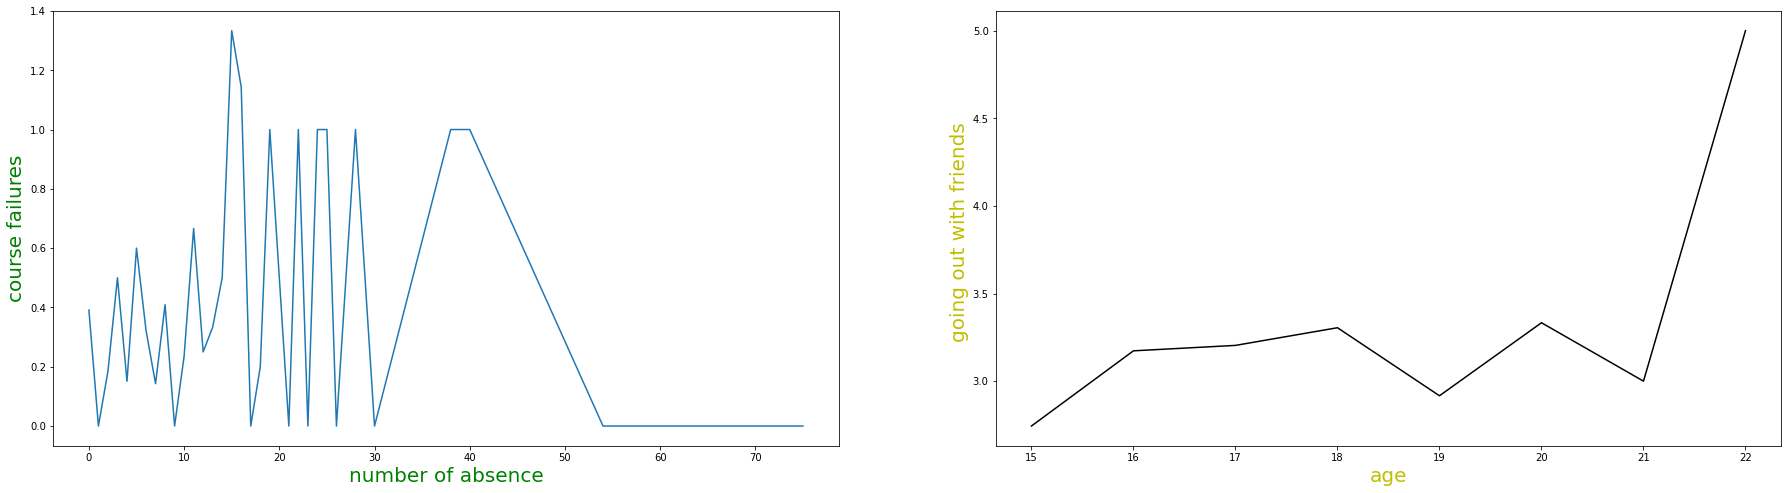

In [250]:

plt.figure(figsize=(12,8))

plt.subplot(121)
plt.plot(df.groupby('absences')['failures'].mean())
plt.xlabel('number of absence',fontsize=20 ,color='g')
plt.ylabel('course failures',fontsize=20, color='g')
plt.subplot(122)
plt.plot(df.groupby ('age')['goout'].mean(),'-0')
plt.xlabel('age',fontsize=20 , color='y')
plt.ylabel('going out with friends ',fontsize=20 ,color='y')
#plt.title('my plot')
plt.subplots_adjust(right=3,left=1)


#plt.title('No. of absences  vs  failures',fontsize=14)

plt.show()

In [ ]:
#תובנה 4: נראה כי אין מגמה ברורה המצביעה על קשר בין מספר ההעדרויות למספר הכשלונות בקורסים דבר המחזק את המסקנות מהגרפים הקודמים 
 # .ובנוסף לכך הגרף השני מציג באופן ברור כי עיקר היציאות לבילוי מתרחש בגילאי 21-22 ולכן מחזק את הניתוח למעלה על צריכת אלכוהול רבה יותר בגיל זה
         

In [153]:
!pip install plotly

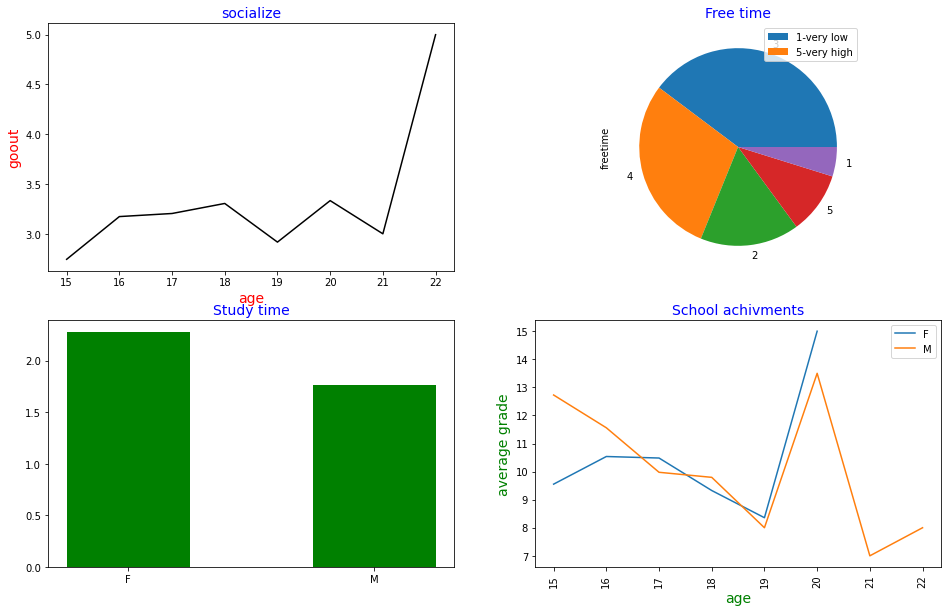

<Figure size 432x288 with 0 Axes>

In [274]:

plt.figure(figsize=(16,10))
plt.subplot(221)
plt.plot(df.groupby ('age')['goout'].mean(),'-0')

#df['age'].value_counts().plot(kind="barh")
plt.xlabel('age',fontsize=14, color='r')
plt.ylabel('goout',fontsize=14,color='r')
plt.title('socialize',color='b',fontsize=14)

plt.subplot(222)
df['freetime'].value_counts().plot(kind="pie")
plt.legend(['1-very low', '5-very high'])
plt.title('Free time',color='b',fontsize=14)
#plt.legend(['1-very low', '5-very high'])

plt.subplot(223)
plt.bar(df.groupby('sex')['studytime'].mean().index,
       df.groupby('sex')['studytime'].mean().values,width=0.5,color='g')

plt.title('Study time',color='b',fontsize=14)

plt.subplot(224)
plt.plot(df.query('sex == "F"').groupby('age')['G3'].mean())
plt.plot(df.query('sex == "M"').groupby('age')['G3'].mean())
plt.legend(['F', 'M'])
plt.xticks(rotation=90)
plt.xlabel('age',fontsize=14, color='g')
plt.ylabel('average grade',fontsize=14, color='g')
plt.title('School achivments',color='b',fontsize=14)
plt.show()

#df['studytime'].value_counts().plot(kind="pie")

plt.subplots_adjust(right=3,left=2)

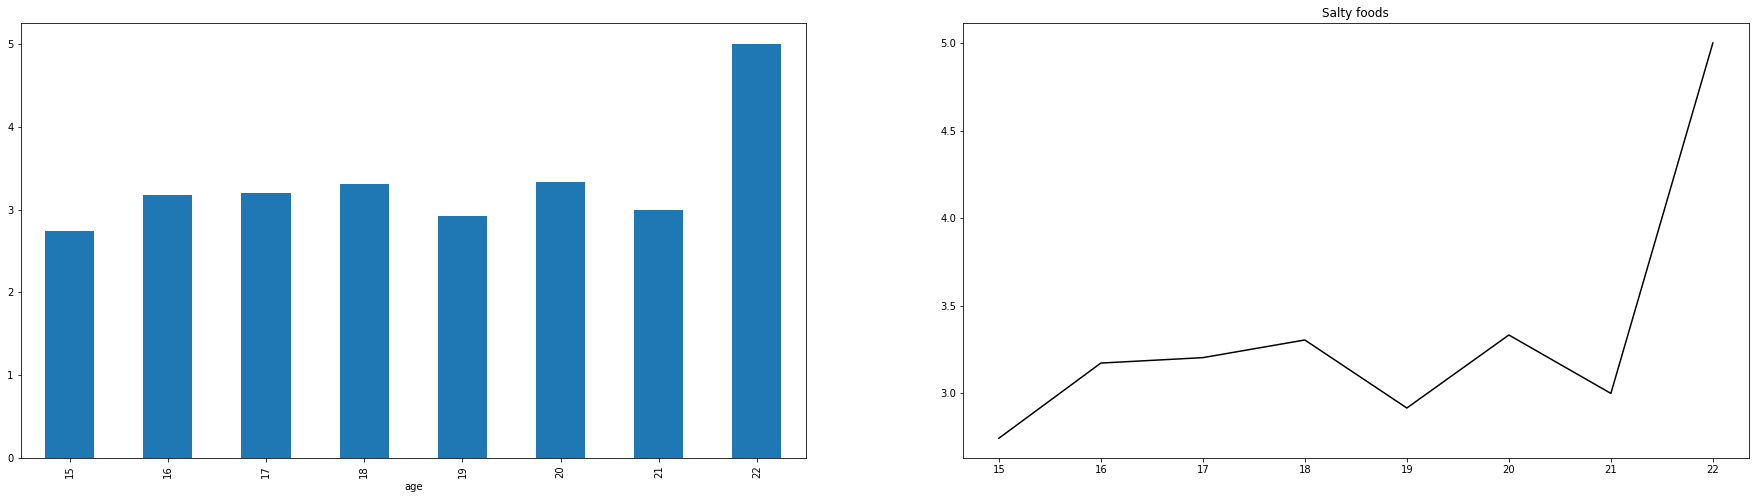

In [78]:

plt.figure(figsize=(12,8))

plt.subplot(121)
df.groupby ('age')['goout'].mean().plot(kind="bar")

plt.subplot(122)
plt.plot(df.groupby ('age')['goout'].mean(),'-0')
plt.title('Salty foods')
plt.subplots_adjust(right=3,left=1)

In [ ]:
#  קיימת עלייה חדה בקבוצת הגיל 21-22 במספר היציאות לבילוי, דבר היכול להצביע על צריכת אלכוהול יותר גבוהה בקבוצת גיל זו.

In [303]:
df[['age','Walc','Dalc','G3']].sort_values(by=['G3'],ascending=False).head(10)

age  Walc  Dalc  G3
47    16     1     1  20
113   15     1     1  19
110   15     1     1  19
286   18     2     1  19
8     15     1     1  19
374   18     1     1  19
91    15     3     1  18
42    15     1     1  18
36    15     1     1  18
129   16     5     2  18

In [197]:
df.age.value_counts().sort_values()

22      1
21      1
20      3
19     24
18     82
15     82
17     98
16    104
Name: age, dtype: int64

In [204]:
df.groupby('age')['G3'].mean()

age
15    11.256098
16    11.028846
17    10.275510
18     9.548780
19     8.208333
20    14.000000
21     7.000000
22     8.000000
Name: G3, dtype: float64

In [ ]:
# שאלה 3:

In [281]:
def new_function(group,target,C):
    fig = px.scatter(df, x=group, y=target, color=C)
    fig.show()


new_function('age','absences','sex')

In [311]:
def new_function(group,target,C,S):
    fig = px.scatter(df, x=group, y=target, color=C,size="G3")
    fig.show()


new_function('G3','absences','sex','G3')

In [ ]:
# מסקנות: קבוצת הגילאים הגדולה שעליה מתבסס הקובץ הינה בין 15-18.
#בקבוצה זו נראה כי צריכת האלכוהול אינה משפיעה על שאר התחומים בחייהם בצורה גדולה או קיצונית.
# הבנות נעדרות יותר והישגיהן הלימודיים פחות טובים משל הבנים.
# נושא הדאטה סט הוא צריכת אלכוהול בקרב בני נוער ומתוך הניתוחים נראה כי הצריכה המרובה נעשית דווקא בגילאי 20-22